# The Sequential model API

## Coding tutorials
#### [1. Building a Sequential model](#coding_tutorial_1)
#### [2. Convolutional and pooling layers](#coding_tutorial_2)
#### [3. The compile method](#coding_tutorial_3)
#### [4. The fit method](#coding_tutorial_4)
#### [5. The evaluate and predict methods](#coding_tutorial_5)

In [1]:
import tensorflow as tf
print(tf.__version__)
# Check GPU available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

2.2.0


***
## Load the data

In [2]:
from tensorflow.keras.preprocessing import image

# Load the Fashion-MNIST data
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

# Print the shape of the training data
print("Train data shape: {}".format(train_images.shape))

# Define the labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Train label at 0:", train_labels[0])

Train data shape: (60000, 28, 28)
Train label at 0: 9


In [3]:
# Rescale the image values so that they lie in between 0 and 1
train_images = train_images / 255.
test_images = test_images / 255.

label: Coat


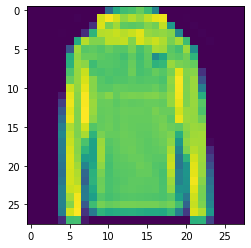

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Display one of the images
i = 24
img = train_images[i,:,:]
print(f"label: {labels[train_labels[i]]}")
plt.imshow(img)
plt.show()

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

#### Build a feedforward neural network model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Build the sequential feedforward neural network model

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(16, activation='relu', name='layer_1'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.weights

[<tf.Variable 'layer_1/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[-0.04007703, -0.04645088,  0.01147873, ...,  0.07439575,
         -0.02683991,  0.02115749],
        [ 0.06235439, -0.00723403,  0.06793295, ...,  0.08441882,
         -0.06749522, -0.07179968],
        [-0.08350427,  0.03713949, -0.06227425, ...,  0.07643341,
          0.05434182,  0.02572574],
        ...,
        [ 0.0234036 , -0.07620956, -0.05773832, ...,  0.06065176,
          0.08233364,  0.00343005],
        [ 0.05159368,  0.01036442,  0.00765173, ..., -0.02062424,
         -0.02431526, -0.01937024],
        [ 0.01714008, -0.06927022, -0.02799062, ...,  0.00581513,
          0.00330699,  0.01186266]], dtype=float32)>,
 <tf.Variable 'layer_1/bias:0' shape=(16,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'dense/kernel:0' shape=(16, 16) dtype=float32, numpy=
 array([[-0.00289252,  0.0469383 , -0.39725044, -0.06426

***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [9]:
# Define the model optimizer, loss function and metrics
model.compile(optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', 'top_k_categorical_accuracy'])

# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.01>


In [10]:
import numpy as np 

# Fit the model
history = model.fit(train_images, train_labels,
    epochs=8, batch_size=32, verbose=2)

Epoch 1/8
1875/1875 - 3s - loss: 1.6109 - accuracy: 0.4932 - top_k_categorical_accuracy: 0.4943
Epoch 2/8
1875/1875 - 3s - loss: 1.0312 - accuracy: 0.6716 - top_k_categorical_accuracy: 0.5969
Epoch 3/8
1875/1875 - 3s - loss: 0.8419 - accuracy: 0.7255 - top_k_categorical_accuracy: 0.5829
Epoch 4/8
1875/1875 - 3s - loss: 0.7252 - accuracy: 0.7608 - top_k_categorical_accuracy: 0.5530
Epoch 5/8
1875/1875 - 3s - loss: 0.6442 - accuracy: 0.7880 - top_k_categorical_accuracy: 0.5094
Epoch 6/8
1875/1875 - 4s - loss: 0.5888 - accuracy: 0.8058 - top_k_categorical_accuracy: 0.4940
Epoch 7/8
1875/1875 - 3s - loss: 0.5495 - accuracy: 0.8178 - top_k_categorical_accuracy: 0.5032
Epoch 8/8
1875/1875 - 4s - loss: 0.5213 - accuracy: 0.8258 - top_k_categorical_accuracy: 0.5115


       loss  accuracy  top_k_categorical_accuracy
0  1.610942  0.493167                    0.494300
1  1.031184  0.671650                    0.596900
2  0.841900  0.725483                    0.582917
3  0.725170  0.760800                    0.553033
4  0.644241  0.788000                    0.509433


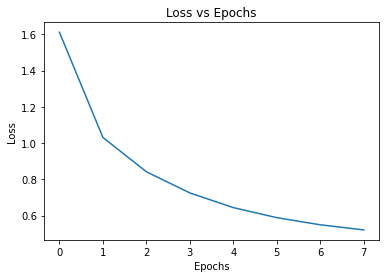

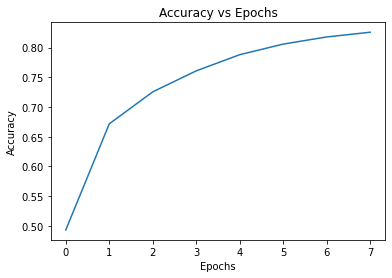

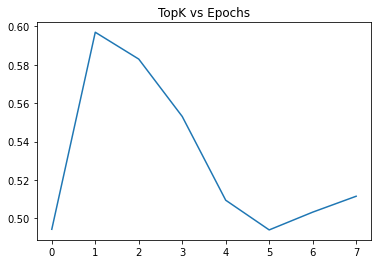

In [11]:
# Plot training history
import pandas as pd

# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
print(df.head())

# Make a plot for the loss
loss_plot = df.plot(y="loss", title="Loss vs Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")
plt.show()

# Make a plot for the accuracy
acc_plot = df.plot(y="accuracy",
    title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")
plt.show()

# Make a plot for the topK
topk_plot = df.plot(y="top_k_categorical_accuracy",
    title="TopK vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="TopK")
plt.show()

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods
#### Evaluate the model on the test set

In [12]:
# Evaluate the model
test_loss, test_acc, test_topk = model.evaluate(test_images, 
    test_labels, verbose=2)

313/313 - 1s - loss: 0.5339 - accuracy: 0.8202 - top_k_categorical_accuracy: 0.5182


#### Make predictions from the model

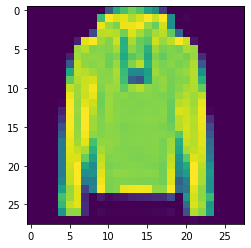

Label: Pullover
Model predictions: Coat


In [18]:
# Choose a random test image

random_idx = np.random.choice(test_images.shape[0])
test_image = test_images[random_idx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_idx]]}")

# Get the model predictions
pred = model.predict(test_image[np.newaxis,...])
print(f"Model predictions: {labels[np.argmax(pred)]}")

***
<a id="coding_tutorial_2"></a>
## Convolution and pooling layers
#### Build a convolutional neural network model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16, kernel_size=3, padding='SAME', strides=2, 
        activation='relu', input_shape=(28,28,1), 
        data_format='channels_last'),
    MaxPooling2D(pool_size=3, data_format='channels_last'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 17,258
Trainable params: 17,258
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [20]:
# Define the model optimizer, loss function and metrics
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy, \
    SparseTopKCategoricalAccuracy

model.compile(optimizer=Adam(learning_rate=1e-3),
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy(),
        SparseTopKCategoricalAccuracy()])

# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


In [22]:
import numpy as np 

# Fit the model
history = model.fit(train_images[...,np.newaxis], train_labels,
    epochs=8, batch_size=32)

Epoch 1/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3097 - sparse_categorical_accuracy: 0.8857 - sparse_top_k_categorical_accuracy: 0.9985
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3010 - sparse_categorical_accuracy: 0.8881 - sparse_top_k_categorical_accuracy: 0.9986
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2948 - sparse_categorical_accuracy: 0.8902 - sparse_top_k_categorical_accuracy: 0.9986
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2874 - sparse_categorical_accuracy: 0.8931 - sparse_top_k_categorical_accuracy: 0.9988
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2820 - sparse_categorical_accuracy: 0.8942 - sparse_top_k_categorical_accuracy: 0.9988
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2773 - sparse_categorical_accuracy: 0.8962 - sparse_top_k_categorical_accuracy: 0.9989
Epoch 7/8
1875/1

       loss  sparse_categorical_accuracy  sparse_top_k_categorical_accuracy
0  0.309706                     0.885717                           0.998483
1  0.301004                     0.888067                           0.998633
2  0.294811                     0.890183                           0.998633
3  0.287417                     0.893050                           0.998783
4  0.281965                     0.894217                           0.998833


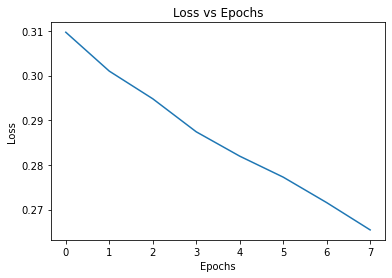

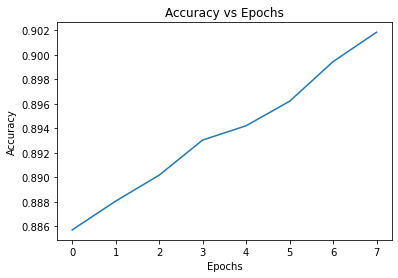

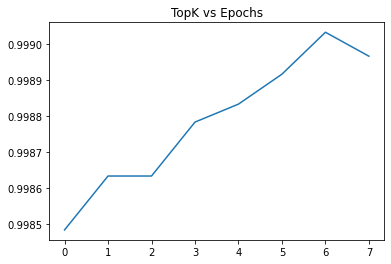

In [23]:
# Plot training history
import pandas as pd

# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
print(df.head())

# Make a plot for the loss
loss_plot = df.plot(y="loss", title="Loss vs Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")
plt.show()

# Make a plot for the accuracy
acc_plot = df.plot(y="sparse_categorical_accuracy",
    title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")
plt.show()

# Make a plot for the topK
topk_plot = df.plot(y="sparse_top_k_categorical_accuracy",
    title="TopK vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="TopK")
plt.show()

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods
#### Evaluate the model on the test set

In [24]:
# Evaluate the model
test_loss, test_acc, test_topk = model.evaluate(test_images[...,np.newaxis], 
    test_labels, verbose=2)

313/313 - 1s - loss: 0.3271 - sparse_categorical_accuracy: 0.8790 - sparse_top_k_categorical_accuracy: 0.9978


#### Make predictions from the model

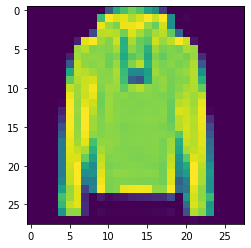

Label: Pullover
Model predictions: Coat


In [25]:
# Choose a random test image

test_image = test_images[random_idx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_idx]]}")

# Get the model predictions
pred = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Model predictions: {labels[np.argmax(pred)]}")